In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt 
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# <a id='Libraries'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#008080;font-family:Helvetica, Arial, sans-serif;color:#FFFFFF;font-size:150%;text-align:left;border-radius:10px;padding:10px;">  Exploratory Data Analysis (EDA)and Data Cleaning   </p>


In [2]:
def wrangle (file_path,encoding=None,drpona_coulmnnames=None,change_column_name=None,date_column=None,remove_duplicated_rows_columnsname=None):
    df=pd.read_csv(file_path,encoding=encoding)
    df.dropna(subset=drpona_coulmnnames,inplace=True)
    df = df.rename(columns=change_column_name)
    df[date_column]=pd.to_datetime(df[date_column])
    df=df.drop_duplicates(subset=remove_duplicated_rows_columnsname)
    df.columns = df.columns.str.strip().str.lower()
    return df


In [32]:
order = wrangle(r"C:\Users\Almodather\Downloads\all_data.csv",encoding='latin-1',drpona_coulmnnames=['OrderID'],change_column_name={'City.1' : 'SuppCity', 'Country.1' : 'SuppCountry', 'Phone.1' : 'Supp_Phone'}, date_column= 'OrderDate', remove_duplicated_rows_columnsname= ['OrderID'])

for cols in order.columns:
    if 'ID' in cols or 'OrderNumber' in cols:
        order[cols]= order[cols].astype(int)
order = order[['customerid', 'firstname', 'lastname', 'city', 'country', 'orderid', 'ordernumber', 'orderdate', 'totalamount' ]]
order.info()


<class 'pandas.core.frame.DataFrame'>
Index: 830 entries, 0 to 2130
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customerid   830 non-null    float64       
 1   firstname    830 non-null    object        
 2   lastname     830 non-null    object        
 3   city         830 non-null    object        
 4   country      830 non-null    object        
 5   orderid      830 non-null    float64       
 6   ordernumber  830 non-null    float64       
 7   orderdate    830 non-null    datetime64[ns]
 8   totalamount  830 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 64.8+ KB


In [33]:
order.describe().T

,count,mean,min,25%,50%,75%,max,std
customerid,830.00,46.41,1.00,24.00,46.00,68.00,91.00,25.99
orderid,830.00,415.50,1.00,208.25,415.50,622.75,830.00,239.74
ordernumber,830.00,"542,792.50","542,378.00","542,585.25","542,792.50","542,999.75","543,207.00",239.74
orderdate,830,2013-08-08 08:12:43.373494016,2012-07-04 00:00:00,2013-02-24 06:00:00,2013-09-09 12:00:00,2014-02-04 00:00:00,2014-05-06 00:00:00,NaN
totalamount,830.00,"1,631.88",12.50,480.00,"1,015.90","2,028.65","17,250.00","1,990.61"


In [34]:
order.isna().sum()

customerid     0
firstname      0
lastname       0
city           0
country        0
orderid        0
ordernumber    0
orderdate      0
totalamount    0
dtype: int64

In [35]:
order.totalamount.describe().T

count      830.00
mean     1,631.88
std      1,990.61
min         12.50
25%        480.00
50%      1,015.90
75%      2,028.65
max     17,250.00
Name: totalamount, dtype: float64

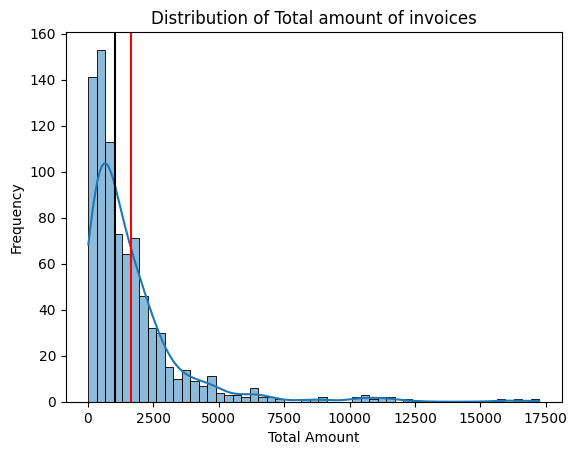

In [5]:
sns.histplot(data=order,x='totalamount',kde= True)
plt.title("Distribution of Total amount of invoices")
plt.xlabel("Total Amount")
plt.ylabel("Frequency")
plt.axvline(order.totalamount.mean(),color='red')
plt.axvline(order.totalamount.median(),color='black');

1- We see the black line in the center of the data that expresses meadin, while the red line is closer to the lower data that expresses mean, so we will use meadin becuse its most accurat.

In [6]:
min = order.totalamount.min()
q1 = order.totalamount.quantile(0.25)
q3=order.totalamount.quantile(0.75)
meadin=order.totalamount.median()
IQR=q3-q1
LP=q1-(1.5*IQR)
UP = q3-(1.5*IQR)
print(f'min = {min}, q1 = {q1}, q2 = {meadin}, q3 = {q3},IQR = {IQR}, UP = {UP}, LP = {LP}')


min = 12.5, q1 = 480.0, q2 = 1015.9, q3 = 2028.65,IQR = 1548.65, UP = -294.3250000000003, LP = -1842.9750000000004


In [7]:
px.box(data_frame=order,x='totalamount')

In [8]:
order = order[order.totalamount<15000]

In [9]:
order.info()

<class 'pandas.core.frame.DataFrame'>
Index: 827 entries, 0 to 2130
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customerid   827 non-null    float64       
 1   firstname    827 non-null    object        
 2   lastname     827 non-null    object        
 3   city         827 non-null    object        
 4   country      827 non-null    object        
 5   orderid      827 non-null    float64       
 6   ordernumber  827 non-null    float64       
 7   orderdate    827 non-null    datetime64[ns]
 8   totalamount  827 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 64.6+ KB


# Data Analysis and visualiztions

In [10]:
px.bar(data_frame=order.city.value_counts(),title='Distribution of Cites')

In [11]:
px.bar(data_frame=order.country.value_counts(),title='Distribution of Country')

In [12]:
px.pie(data_frame=order,names='country',title="Relative Frequency of Countries")

Through the preliminary analysis, we see that london is the city that has the largest share of purchasing our products with 46 invoices, and that the united stats and germany are the most purchasing countries for our products with 121 invoices 14.6% of our total sales.

In [13]:
order.groupby(['country'], as_index=False)['totalamount'].sum().sort_values('totalamount',ascending=False)

,country,totalamount
19,USA,"247,245.08"
8,Germany,"227,390.63"
1,Austria,"139,496.63"
3,Brazil,"99,158.48"
7,France,"85,498.76"
20,Venezuela,"60,814.89"
18,UK,"60,616.51"
16,Sweden,"59,523.70"
9,Ireland,"57,317.39"
4,Canada,"55,334.10"


In [14]:
def plots (columname,Top10=False):
    prop = order.groupby(columname,as_index=False)['totalamount'].sum()
    prop['proportion']=(prop.totalamount/order.totalamount.sum())*100
    prop = prop.sort_values('proportion',ascending=False)
    print('Descibe of all Total amount values',prop.totalamount.describe())
    if Top10 == True :
        prop = prop.head(10)
    fig1=px.bar(data_frame=prop,x=columname,y='totalamount')
    fig2=px.pie(data_frame=prop,names=columname,values='totalamount')
    fig1.show()
    fig2.show()

In [15]:
plots('country')

Descibe of all Total amount values count        21.00
mean     62,146.51
std      67,460.19
min       3,531.95
25%      19,431.89
50%      35,134.98
75%      60,814.89
max     247,245.08
Name: totalamount, dtype: float64


The USA and Germany contribute significantly more to the total amount compared to other countries.
There is a sharp drop-off after the top three countries (USA, Germany, Austria).
Countries like Brazil and France are in the mid-range, indicating moderate contributions.
The lower-tier countries collectively contribute less to the total amount compared to the top few.

In [16]:
plots ('city',True)

Descibe of all Total amount values count        69.00
mean     18,914.15
std      22,692.99
min         357.00
25%       4,788.06
50%      11,830.10
75%      23,850.95
max     113,236.68
Name: totalamount, dtype: float64


We have previously seen London as the city with the highest invoice, but now we notice that Graz it is the highest amount, and this indicates a highe 
(AUV & ATV& UPT)

In [17]:
order.head()

,customerid,firstname,lastname,city,country,orderid,ordernumber,orderdate,totalamount
0,85.00,Paul,Henriot,Reims,France,1.00,"542,378.00",2012-07-04,440.00
3,79.00,Karin,Josephs,Münster,Germany,2.00,"542,379.00",2012-07-05,"1,863.40"
5,34.00,Mario,Pontes,Rio de Janeiro,Brazil,3.00,"542,380.00",2012-07-08,"1,813.00"
8,84.00,Mary,Saveley,Lyon,France,4.00,"542,381.00",2012-07-08,670.80
11,76.00,Pascale,Cartrain,Charleroi,Belgium,5.00,"542,382.00",2012-07-09,"3,730.00"


In [18]:
total_date = order[['totalamount','orderdate']]
total_data = total_date.set_index('orderdate')

In [19]:
px.line(data_frame=total_data)

The total amount exhibits high volatility with irregular peaks.
The data suggests sporadic high-value events amidst generally lower daily values.

In [20]:
data_order=order[['orderdate','country']]
data_order=data_order.set_index('orderdate')
data_order=data_order.country.resample(rule='1M').nunique()
data_order.head()

C:\Users\Almodather\AppData\Local\Temp\ipykernel_11248\407126930.py:3: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



orderdate
2012-07-31    11
2012-08-31    11
2012-09-30    11
2012-10-31    13
2012-11-30    11
Freq: ME, Name: country, dtype: int64

In [21]:
px.line(data_frame=data_order,y='country')

In [22]:
cust_name = {'fullname':order.firstname +' ' +order.lastname,
'totalamount': order.totalamount
}
cust_name = pd.DataFrame(cust_name)
cust_name.head()

,fullname,totalamount
0,Paul Henriot,440.00
3,Karin Josephs,"1,863.40"
5,Mario Pontes,"1,813.00"
8,Mary Saveley,670.80
11,Pascale Cartrain,"3,730.00"


In [23]:
fig = px.bar(cust_name.groupby('fullname')['totalamount'].count().sort_values(ascending=False).head(10),text_auto=True,title='No. of orders per customer count',labels={'fullname':'Full Name ','value': 'Frequency'})
fig.update_traces(marker_color='rgb(158,202,225)',marker_line_color='rgb(8,48,107)',marker_line_width=1.5,opacity=0.6,textposition='outside')

In [24]:
fig = px.bar(cust_name.groupby('fullname')['totalamount'].sum().sort_values(ascending=False).head(10),text_auto=True,title='No. of orders per customer sum',labels={'fullname':'Full Name ','value': 'Frequency'})
fig.update_traces(marker_color='rgb(158,202,225)',marker_line_color='rgb(8,48,107)',marker_line_width=1.5,opacity=0.6,textposition='outside')

In [25]:
multi= order[['orderdate','country','totalamount']]
multi = multi.set_index('orderdate')
multi.head()

,country,totalamount
orderdate,,
2012-07-04,France,440.00
2012-07-05,Germany,"1,863.40"
2012-07-08,Brazil,"1,813.00"
2012-07-08,France,670.80
2012-07-09,Belgium,"3,730.00"


In [26]:
multi = multi.resample('1M').agg({'country':'nunique','totalamount':'sum'})
multi.head()

C:\Users\Almodather\AppData\Local\Temp\ipykernel_11248\809021121.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



,country,totalamount
orderdate,,
2012-07-31,11,"30,192.10"
2012-08-31,11,"26,609.40"
2012-09-30,11,"27,636.00"
2012-10-31,13,"41,203.60"
2012-11-30,11,"49,704.00"


In [27]:
fig = px.bar(
    data_frame=multi, 
    x=multi.index, 
    y=round(multi.totalamount, 0), 
    color=multi.country,
    text_auto=True,
    title='Grand total amount of all countries per month',
    labels={'orderdate': 'Order Date', 'y': 'Total Amount'}
)

fig.update_traces(textposition='outside')
fig.update_layout(title_x=0.5)
fig.show()

In [ ]:
multi=multi.groupby(['orderdate','country'],as_index=False)['totalamount'].sum().sort_values(by='totalamount',ascending=False)
multi.head()

,orderdate,country,totalamount
255,2014-01,USA,"27,594.45"
166,2013-07,USA,"26,022.30"
300,2014-04,Germany,"22,584.49"
249,2014-01,Germany,"22,135.55"
206,2013-10,Germany,"22,079.05"


In [ ]:
multi.orderdate = multi.orderdate.astype('datetime64[ns]')

In [ ]:
fig = px.scatter(
    data_frame=multi,
    x='orderdate',
    y='totalamount',
    color='country',
    size='totalamount'
)

fig.show()

Key Insights:
Dominant Contributors:

The USA and Germany consistently lead in total contributions, both in aggregate and over time.
Austria follows but with less frequency and volume.
Variability:

Total amounts show high variability over time, with significant spikes and dips, suggesting possible events or seasonality that need further exploration.
Country-Wise Distribution:

While a few countries dominate the contributions, many others contribute smaller, more regular amounts.
This distribution highlights the importance of focusing on both high and mid-tier contributors for understanding overall patterns.
Temporal Analysis:

The visualizations suggest specific periods with heightened activity which could correlate with external factors such as promotions, holidays, or other events.